# Strava Heatmap Demo

This notebook shows how to use the Strava API to create route overlay heatmaps. It fetches activities from a specific area and visualises them on an interactive map.
## What it does:
1. Import required packages and custom functions
2. Get activities from the Strava API
3. Fetch the GPS polyline of activities
4. Create a map in folium with overlaid routes to show denisty for the visible area

### Setup and Imports

This cell makes sure all required packages are installed

In [ ]:
import subprocess
import sys

# Install all required functions
packages = ["polyline", "folium", "requests", "pandas"]
for package in packages:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

And then this cell imports the custom functions from the py file

In [ ]:
from a4 import get_strava_activities, extract_gps_points, create_density_heatmap

print("Import successful!")

### Now, it is necessary to do Strava Authorisation

This document requires Strava API access tokens - I won't include mine in this public repo for privacy issues, but will include it in the BB comment so you can input it from there. 
If you have Strava and want to use your own data, that is possible too and isn't (too) complicated to create.

1. Go to https://www.strava.com/settings/api
2. Create an application
3. Validate/authenticate the token
4. It should be ready to use


In [ ]:
# Strava API credentials
CLIENT_ID = "null"
CLIENT_SECRET = "null" 
REFRESH_TOKEN = "null"

# Map centre coordinates - adjust as necessary, but the final map is interactive, though, so the view can be moved around anyway
# Currently on the north of Salzburg to centre around my recent activities
CENTER_LAT = 47.8484
CENTER_LON = 13.0440

Now to fetch the data

In [ ]:
# Get activities from Strava
print("Fetching activities from Strava...")
activities = get_strava_activities(CLIENT_ID, CLIENT_SECRET, REFRESH_TOKEN)

### Get activities

Extract the GPS polyline from the activity data to prepare for heatmap creation.


In [ ]:
print("Extracting GPS coordinates...")
gps_points = extract_gps_points(activities)

# Show a sample of the GPS points or the error message
if gps_points:
    print(f"Sample GPS points: {gps_points[:3]}")
else:
    print("No GPS points found in activities")

## Create the heat map

Create the interactive heatmap showing the density of your activities.


In [ ]:
# Create the heatmap
if gps_points:
    print("Creating heatmap...")
    heatmap = create_density_heatmap(gps_points, CENTER_LAT, CENTER_LON, "strava_heatmap.html")
    print("Heatmap created successfully! Open 'strava_heatmap.html' in your browser to view.")
else:
    print("Cannot create heatmap - no GPS data available")

## And that's it!

The leaflet should be viewable when opened in a web browser. If you used my data, it should look something like this:

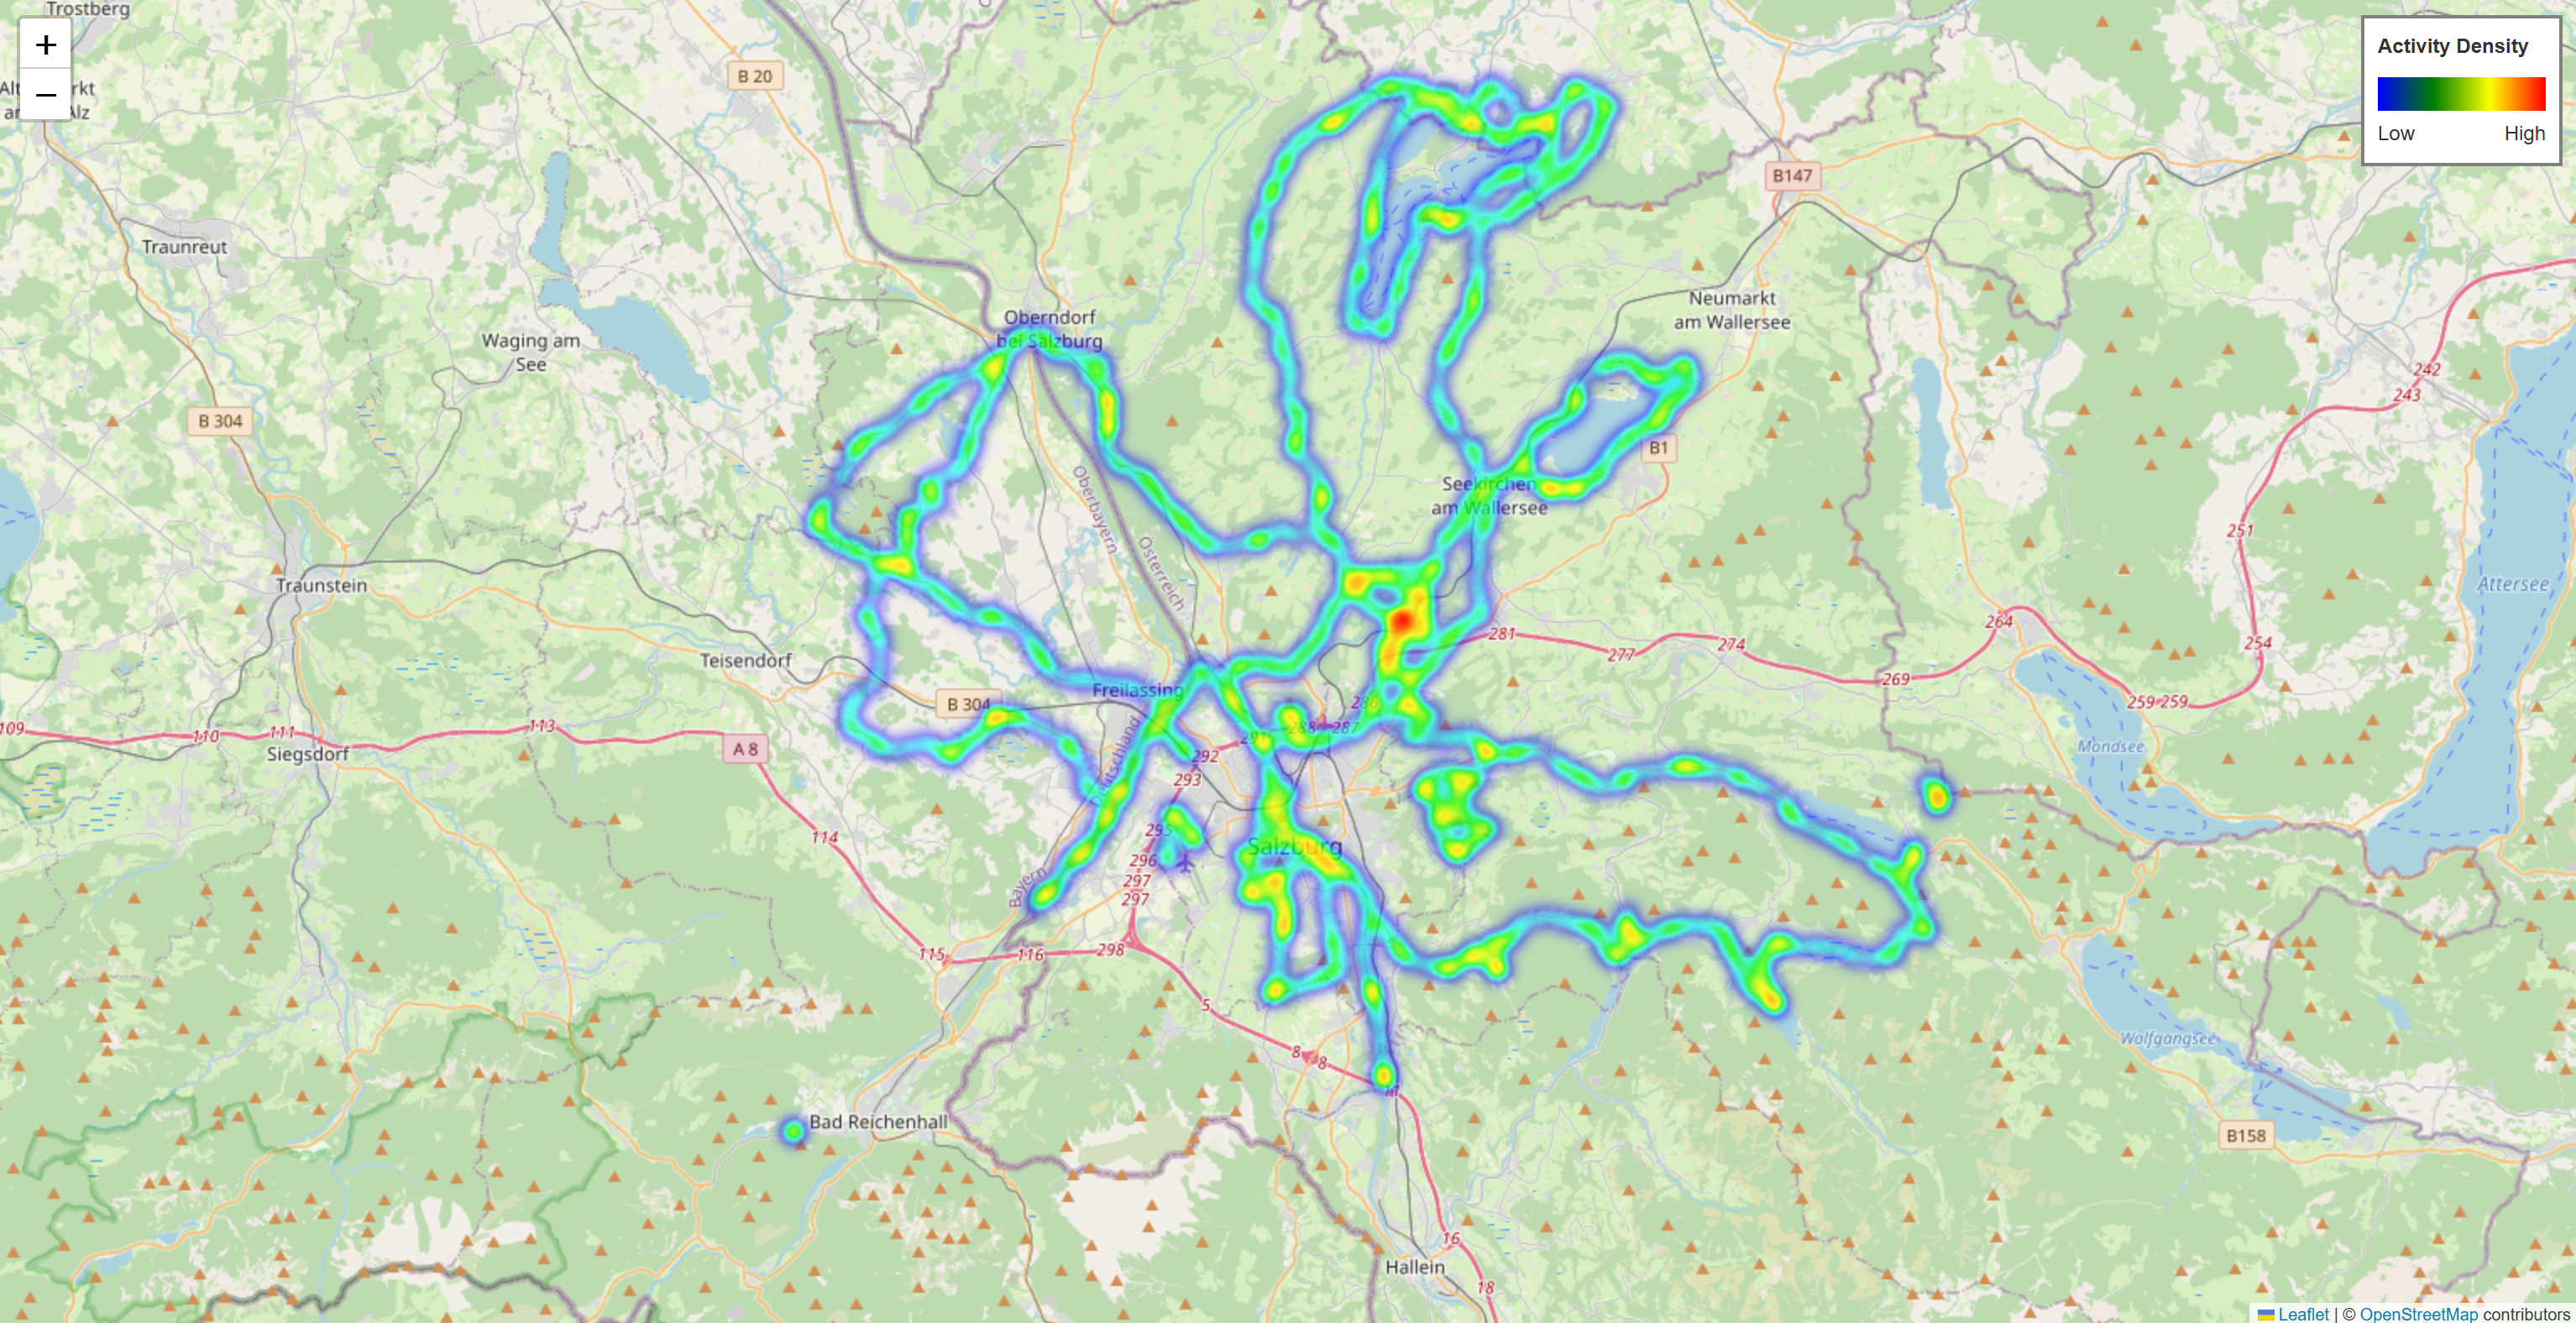

(And if you explore the map, the data in New York, the Isle of Arran or around Vanuatu are correct - they're from Zwift!)

### Future technical improvements which I am considering
1. **Better error handling**: Handle API rate limits better, the 0.1s delay avoids timing out, but it takes a few moments to run.. The limits are 100 requests per 15 minutes
or 1,000 requests per day, so I need to work around this.
2. **Data caching**: I would like to explore a method for saving API responses to prevent repeated requests and avoid exceeding API request limits.
3. **Detail of data**: I have changed the py file from using summarised polylines to detailed, but it still hasn't fixed what can be assumed as gaps in the data, e.g. discontinuous lines on Jakosweg or the Salzach. I need to find other solutions to this issue for better-looking data vis.
4. **Performance**: Optimise for large datasets - I have data on Strava back to 2016, but can't handle it all right now - both the data size and API limit are preventing this.
5. **More responsive web map**: The final HTML map is slightly laggy for me right now due to how data-rich it is.